<a href="https://colab.research.google.com/github/jambdeep/IAySExpertos/blob/main/Clasificaci%C3%B3n_imag%C3%A9nes_KERAS_Mnistconvolucional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [ ]:
from keras.layers.convolutional import Conv2D # to add convolutional layers
from keras.layers.convolutional import MaxPooling2D # to add pooling layers
from keras.layers import Flatten # to flatten data for fully connected layers
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
# import data
from keras.datasets import mnist

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 1s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_test.shape

(10000,)

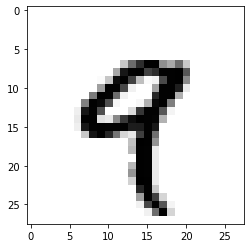

In [ ]:
# VER IMAGEN
plt.imshow(X_train[4], cmap=plt.cm.binary)

In [ ]:
# VER ETIQUETA
print(y_train[4])

9


In [ ]:
# DIMENSIONES DE LOS TENSORES (0D=escalar 1D=vector 2D=matrix ...)
print(X_train.ndim)

3


In [ ]:
# DIMENSIONES DE LOS TENSORES (dimensiones por cada eje)
print(X_train.shape)

(60000, 28, 28)


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
# TIPO DE DATOS
print(X_train.dtype)

uint8


In [ ]:
X_train.shape[0]

60000

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')

In [ ]:
# DIMENSIONES DE LOS TENSORES (0D=escalar 1D=vector 2D=matrix ...)
print(X_train.ndim)

4


In [ ]:
# TIPO DE DATOS
print(X_train.dtype)

float32


In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [ ]:
X_test.shape

(10000, 28, 28, 1)

In [ ]:
X_train = X_train / 255 # normalize training data
X_test = X_test / 255 # normalize test data

In [ ]:
X_train[1]

In [ ]:
# ETIQUETA DE SALIDA
print(y_train[5])

2


In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1] # number of categories

In [ ]:
# ETIQUETA DE SALIDA
print(y_train[4])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
y_train[4]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
num_classes

10

In [ ]:
def convolutional_model():
    
    # create model
    model = Sequential()
    model.add(Conv2D(16, (5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

In [ ]:
# build the model
model = convolutional_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





 - 15s - loss: 0.2787 - acc: 0.9219 - val_loss: 0.1036 - val_acc: 0.9712
Epoch 2/20
 - 2s - loss: 0.0835 - acc: 0.9760 - val_loss: 0.0593 - val_acc: 0.9819
Epoch 3/20
 - 2s - loss: 0.0572 - acc: 0.9836 - val_loss: 0.0500 - val_acc: 0.9850
Epoch 4/20
 - 2s - loss: 0.0441 - acc: 0.9872 - val_loss: 0.0510 - val_acc: 0.9828
Epoch 5/20
 - 2s - loss: 0.0368 - acc: 0.9889 - val_loss: 0.0484 - val_acc: 0.9843
Epoch 6/20
 - 2s - loss: 0.0307 - acc: 0.9904 - val_loss: 0.0361 - val_acc: 0.9876
Epoch 7/20
 - 2s - loss: 0.0243 - acc: 0.9928 - val_loss: 0.0411 - val_acc: 0.9855
Epoch 8/20
 - 1s - loss: 0.0214 - acc: 0.9938 - val_loss: 0.0396 - val_acc: 0.9868
Epoch 9/20
 - 2s - loss: 0.0179 - acc: 0.9942 - val_loss: 0.0405 - val_acc: 0.9867
Epoch 10/20
 - 2s - loss: 0.0147 - acc: 0.9955 - val_loss: 0.0371 - val_acc: 0.9874
Epoch 11/2

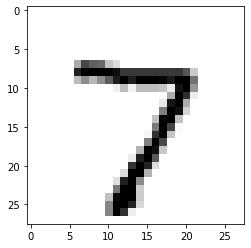

In [ ]:
# VER IMAGEN DE PRUEBA
plt.imshow(X_test[0,:,:,0], cmap=plt.cm.binary)

In [ ]:
# PREDECIR CON EL MODELO ENTRENADO
predictions = model.predict(X_test)

In [ ]:
# CLASE CON LA PROBABILIDAD MAS ALTA
np.argmax(predictions[0])

7

In [ ]:
# PROBABILIDADES DE TODOS LAS CLASES
print(predictions[0])

[2.3042064e-14 5.7172085e-15 1.3160232e-11 5.0084409e-10 1.9415143e-21
 2.5425257e-13 2.3068521e-23 1.0000000e+00 8.0149261e-13 3.9416625e-12]


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

In [ ]:
W = model.get_weights()

In [ ]:
W[0].shape

(5, 5, 1, 16)

In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               230500    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 231,926
Trainable params: 231,926
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# lista de los tamaños (shapes) de cada matriz de parámetros:
# W = pesos, b = bias
for i in range(0, len(W)):
    if (i%2 ==0): print('capa W' + str(i//2) + ':', W[i].shape)
    else: print('capa b' + str(i//2) + ':', W[i].shape)

capa W0: (5, 5, 1, 16)
capa b0: (16,)
capa W1: (2304, 100)
capa b1: (100,)
capa W2: (100, 10)
capa b2: (10,)


In [ ]:
# capturamos los filtros en la primer capa
filtros = W[0].reshape(5, 5, 16)

NameError: ignored

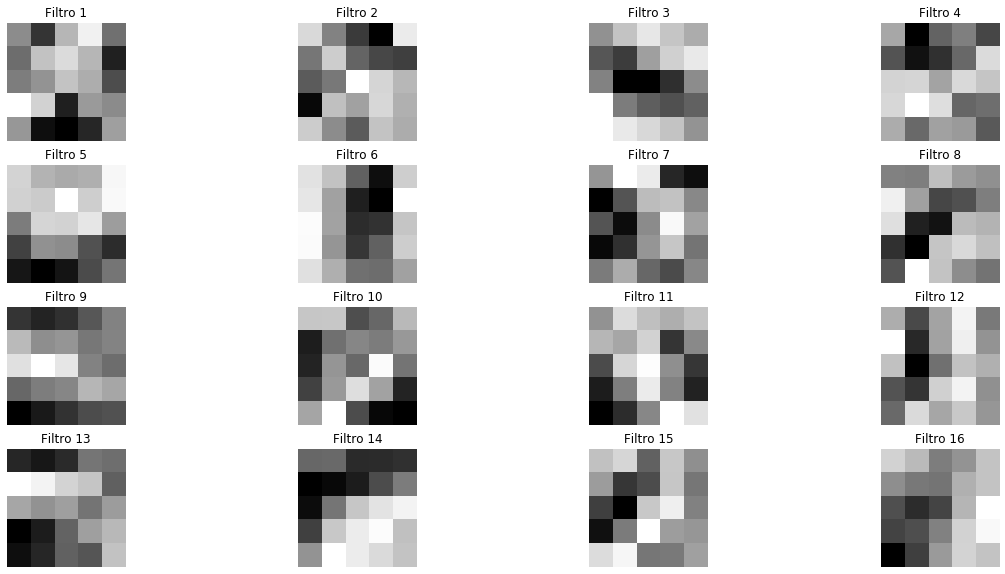

In [ ]:
# plot
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 10})
for i in range(0, 16):
    plt.subplot(4, 4, i+1)
    plt.imshow(filtros[:,:,i], cmap='gray')
    plt.title('Filtro ' + str(i+1))
    plt.axis('off')
plt.show()

In [ ]:
# construimos una red conteniendo sólo la primer capa
capa1 = Sequential()
capa1.add(model.get_layer('conv2d_1'))
capa1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 16)        416       
Total params: 416
Trainable params: 416
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# número entre 0 y 9,999 para seleccionar una imagen de prueba
idx = 300

# aplicar la capa1 a la imagen
filtered_image = capa1.predict(X_test[idx:idx+1])

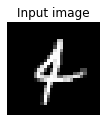

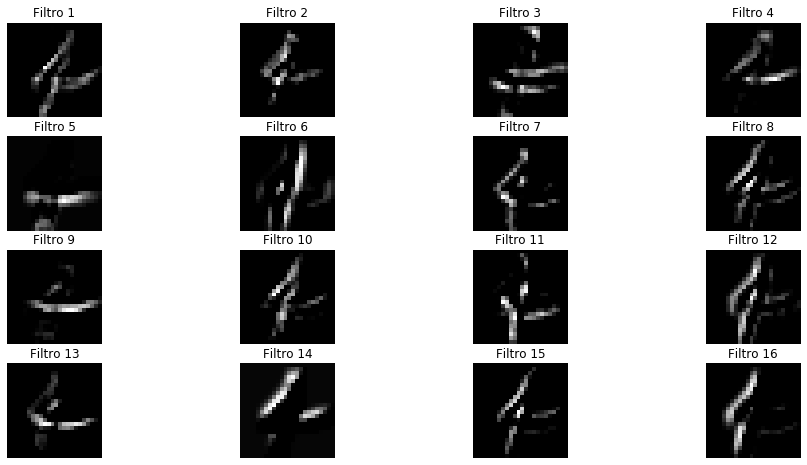

In [ ]:
# plot
plt.figure(figsize=(1.7,1.7))
plt.rcParams.update({'font.size': 10})
plt.imshow(X_test[idx,:,:,0], cmap='gray')
plt.title('Input image')
plt.axis('off')
plt.show()

plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size': 10})
for i in range(0, 16):
    plt.subplot(4, 4, i+1)
    plt.imshow(filtered_image[0,:,:,i], cmap='gray')
    plt.title('Filtro ' + str(i+1))
    plt.axis('off')
plt.show()

In [ ]:
# construimos otra red conteniendo la segunda capa de filtros
capa2 = Sequential()
capa2.add(model.get_layer('conv2d_1'))
capa2.add(model.get_layer('max_pooling2d_1'))
capa2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
Total params: 416
Trainable params: 416
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# número entre 0 y 9,999 para seleccionar una imagen de prueba
idx = 300

# aplicar la capa1 a la imagen
filtered_image2 = capa2.predict(X_test[idx:idx+1])

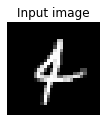

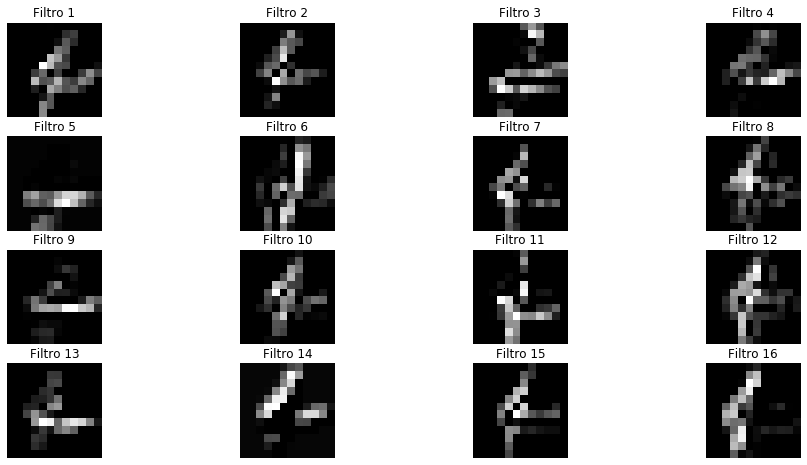

In [ ]:
# plot
plt.figure(figsize=(1.7,1.7))
plt.rcParams.update({'font.size': 10})
plt.imshow(X_test[idx,:,:,0], cmap='gray')
plt.title('Input image')
plt.axis('off')
plt.show()

plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size': 10})
for i in range(0, 16):
    plt.subplot(4, 4, i+1)
    plt.imshow(filtered_image2[0,:,:,i], cmap='gray')
    plt.title('Filtro ' + str(i+1))
    plt.axis('off')
plt.show()